In [9]:
import numpy as np
import sympy as smp 
import matplotlib.pyplot as plt
from scipy.integrate import quad, quad_vec


Consider a current $I$ flowing counterclockwise in a loop in the xy-plane:

$$\vec{l}(t) = R \left<\cos t, \sin t, 0 \right> $$

where, $0 \leq t \leq 2\pi$. The Biot-Savard Law tells us:

$$\vec{B}(\vec{r}) =  \frac{\mu_0 I}{4 \pi} \int_C \frac{d\vec{l} \times (\vec{r}-\vec{l})}{|\vec{r}-\vec{l}|^3} = \int_0^{2 \pi} \frac{d\vec{l}/dt \times (\vec{r} - \vec{l})}{|\vec{r}-\vec{l}|^3} dt$$

Putting this in dimensionless form

* $\vec{l} \to \vec{l}/R$
* $\vec{r} \to \vec{r}/R$

we get

$$\frac{4 \pi R}{\mu_0 I} \vec{B}(\vec{r}) = \int_0^{2 \pi} \frac{d\vec{l}/dt \times (\vec{r} - \vec{l})}{|\vec{r}-\vec{l}|^3} dt$$

In [2]:
# get the integrand of the above equation using sympy 
x,y,z,t = smp.symbols('x,y,z,t')
r = smp.Matrix([x,y,z])                   # coordinates(x,y,z) of the place where the filed is measured 
l = smp.Matrix([smp.cos(t),smp.sin(t),0]) # coordinates(x,y,z) on the current loop 
sep = r-l                                 # vector pointing from measured point to another point in current loop           
integrand = smp.diff(l,t).cross(sep)/sep.norm()**3

In [3]:
integrand

Matrix([
[                                    z*cos(t)/(Abs(z)**2 + Abs(x - cos(t))**2 + Abs(y - sin(t))**2)**(3/2)],
[                                    z*sin(t)/(Abs(z)**2 + Abs(x - cos(t))**2 + Abs(y - sin(t))**2)**(3/2)],
[(-(x - cos(t))*cos(t) - (y - sin(t))*sin(t))/(Abs(z)**2 + Abs(x - cos(t))**2 + Abs(y - sin(t))**2)**(3/2)]])

In [4]:
# get the x,y,z components of integrand 
dBxdt = smp.lambdify([t,x,y,z],integrand[0])
dBydt = smp.lambdify([t,x,y,z],integrand[1])
dBzdt = smp.lambdify([t,x,y,z],integrand[2])

In [10]:
# this function returns the magnetic field at point(x,y,z)
# scipy quadvec fucntion can be used to do integration of vector valued fucntions 
# (in this example f(x,y,z) and x,y and z all are vectors )
def B(x,y,z):
    Bx = quad_vec(dBxdt,0,2*np.pi,args=(x,y,z))[0]
    By = quad_vec(dBydt,0,2*np.pi,args=(x,y,z))[0]
    Bz = quad_vec(dBzdt,0,2*np.pi,args=(x,y,z))[0]
    return np.array([Bx,By,Bz])

In [6]:
# find B at (0,0,0)
B(0,0,0)

array([0.        , 0.        , 6.28318531])

In [7]:
# define a meash to evaluate B at regular grid points 
x = np.linspace(-0.5,0.5,50)
xv,yv,zv = np.meshgrid(x,x,x)

# evaluate the B at each point in a mesh 
Bx,By,Bz = B(xv,yv,zv)

Text(0, 0.5, '$\\frac{4\\pi R}{\\mu_0I}$')

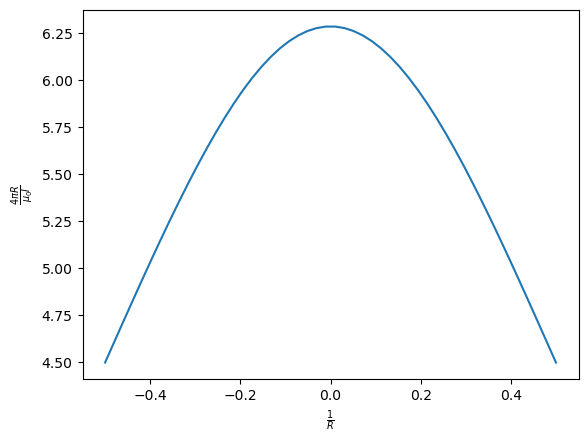

In [27]:
# plot the agnetic field along z axis 
plt.plot(x,Bz[25,25,:])
plt.xlabel(r'$\frac{1}{R}$')
plt.ylabel(r'$\frac{4\pi R}{\mu_0I}$')